0.0
1.6502657398133127
8.021265739813312
1.5707963267948966
1.6502657398133127
8.021265739813312
3.141592653589793
1.6502657398133127
8.021265739813312
4.71238898038469
1.6502657398133127
8.021265739813312


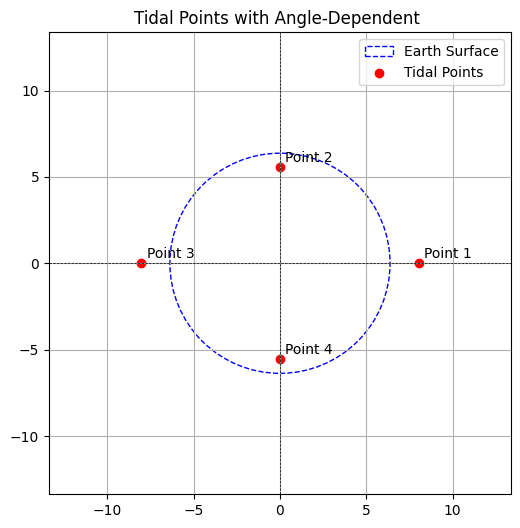

In [78]:
import numpy as np
from sympy import symbols, integrate
import matplotlib.pyplot as plt



G = 6.67430e-17  # Gravitational constant (m^3 kg^-1 s^-2)
MASS_MOON = 7.348e16  # Mass of the Moon (kg)
MASS_POINT = 100        # Mass of each point (arbitrary unit)
DIS_EARTH_MOON = 3.844e2  # Distance between Earth's center and Moon (m)
RADIUS_EARTH = 6.371  # Earth's radius (m)

# Circle parameters
radius = RADIUS_EARTH  # Base radius of the circle
angles = np.linspace(0, 2 * np.pi, 5)[:-1]  # 0, 90, 180, 270 degrees (in radians)

# Translation function depending on the angle
def translationx(angle):
    t = 3000000
    force_x = 2 * G * MASS_MOON * MASS_POINT * RADIUS_EARTH / DIS_EARTH_MOON**3  # Factor for F_tide_x  
    acceleration_x= force_x/ MASS_POINT  
    # Calculate displacement by integrating velocity
    displacement_x = acceleration_x* (t^2) /2 
    print(displacement_x)
    return displacement_x # Example: sinusoidal translation

def translationy(angle):
    t = 3000000
    force_y = G * MASS_MOON * MASS_POINT * RADIUS_EARTH / DIS_EARTH_MOON**3  # Factor for F_tide_y
    acceleration_y= force_y/ MASS_POINT
    displacement_y = acceleration_y* (t^2) /2 
    return displacement_y  # Example: sinusoidal translation

# Calculate points with translations
x_points = []
y_points = []
for theta in angles:
    print(theta)
    rx_translated = radius + translationx(theta)
    print(rx_translated)
    ry_translated = radius - translationy(theta) 
    x_points.append(rx_translated*np.cos(theta))
    y_points.append(ry_translated*np.sin(theta))

# Plot the circle and points
circle = plt.Circle((0, 0), radius, color='blue', fill=False, linestyle='dashed', label="Earth Surface")
fig, ax = plt.subplots(figsize=(6, 6))

# Add the circle
ax.add_artist(circle)

# Plot the translated points
ax.scatter(x_points, y_points, color='red', label="Tidal Points")

# Add annotations for the points
for i, (x, y) in enumerate(zip(x_points, y_points)):
    ax.text(x + 0.3, y + 0.3, f"Point {i+1}", fontsize=10, zorder=5)

# Set equal aspect ratio and grid
ax.set_xlim(-radius - 7, radius + 7)
ax.set_ylim(-radius - 7, radius + 7)
ax.set_aspect('equal')
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax.grid(True)

# Add title and legend
plt.title("Tidal Points with Angle-Dependent ")
plt.legend()
plt.show()
